# Neural Networks (Deep Learning)

A family of algorithms known as neural networks has recently seen a revival under the name “deep learning.” While deep learning shows great promise in many machine learning applications, deep learning algorithms are often tailored very carefully to a specific use case. Here, we will only discuss some relatively simple methods, namely multilayer perceptrons for classification and regression, that can serve as a starting point for more involved deep learning methods. Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks.

## The neural network model

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from rich.jupyter import display



In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)  # By default, the MLP uses 100 hidden nodes



Text(0, 0.5, 'Feature 1')

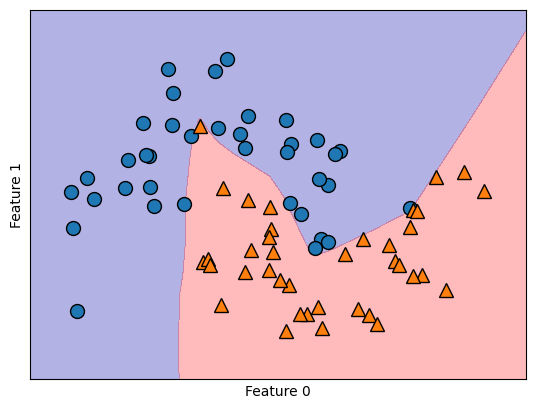

In [5]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [6]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)

C:\Users\thami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=[10], random_state=0, solver='lbfgs')

Text(0, 0.5, 'Feature 1')

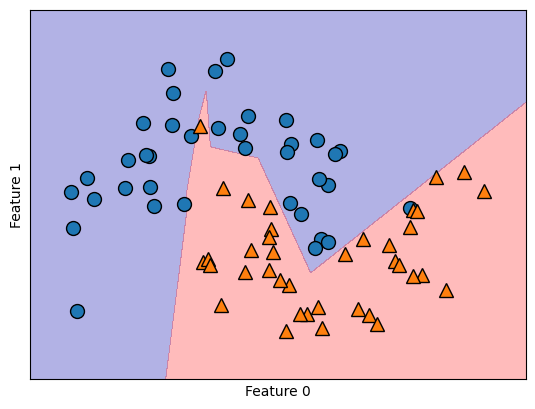

In [7]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\thami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

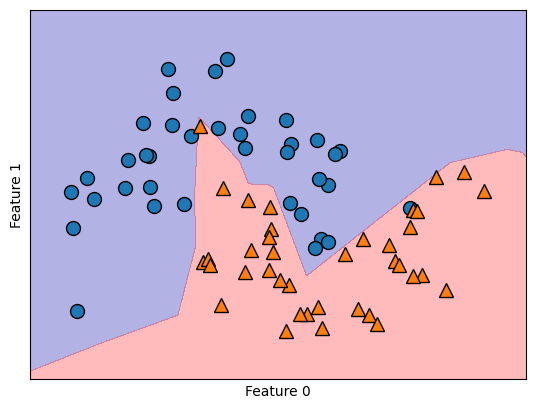

In [9]:
# using two hidden layers each with 10 units

mlp2=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10])
mlp2.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp2, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\thami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

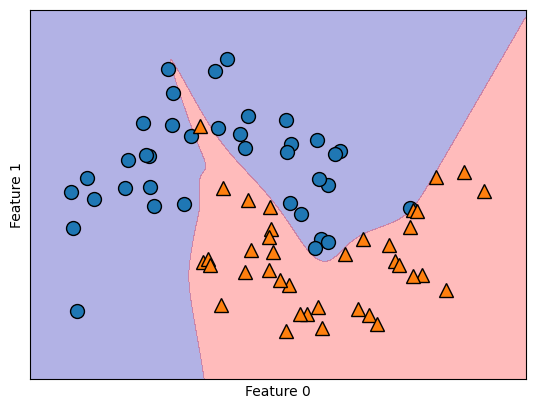

In [10]:
# # using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp3=MLPClassifier(solver='lbfgs',random_state=0,activation='tanh',hidden_layer_sizes=[10,10])
mlp3.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp3, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\thami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\thami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\thami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptr

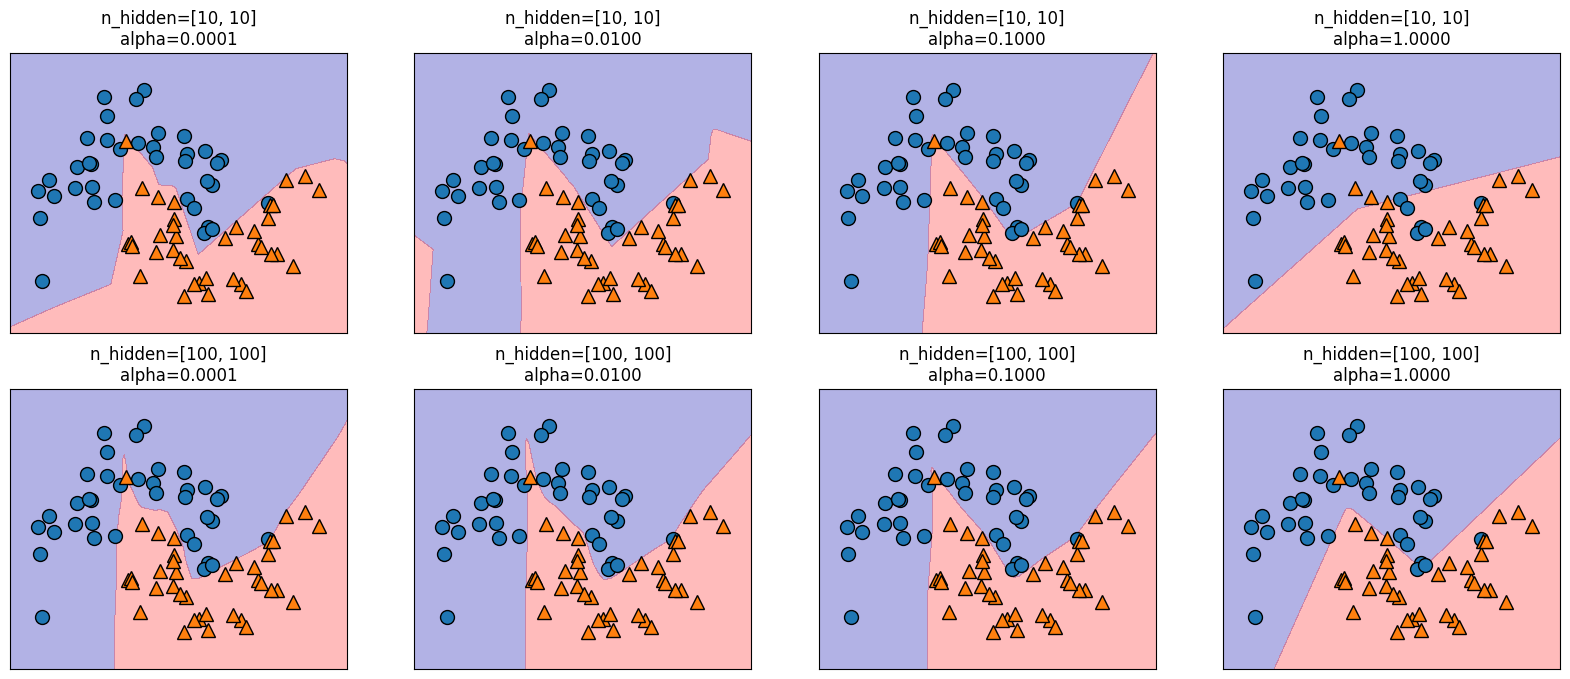

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

As you probably have realized by now, there are many ways to control the complexity of a neural network: the number of hidden layers, the number of units in each hidden layer, and the regularization (alpha). There are actually even more, which we won’t go into here.

In [14]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [15]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [16]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


The accuracy of the MLP is quite good, but not as good as the other models. As in the earlier SVC example, this is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements.

In [18]:


mean_on_train=X_train.mean(axis=0) # compute the mean value per feature on the training set
std_on_train=X_train.std(axis=0) # # compute the standard deviation of each feature on the training set

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled=(X_train-mean_on_train)/std_on_train

X_test_scaled = (X_test - mean_on_train) / std_on_train # # use THE SAME transformation (using training mean and std) on the test set


mlp=MLPClassifier(random_state=42)
mlp.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.965


C:\Users\thami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:

#The results are much better after scaling, and already quite competitive. We got a warning from the model, though, that tells us that the maximum number of iterations has been reached. This is part of the adam algorithm for learning the model, and tells us that we should increase the number of iterations:

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Increasing the number of iterations only increased the training set performance, not the generalization performance.

In [23]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


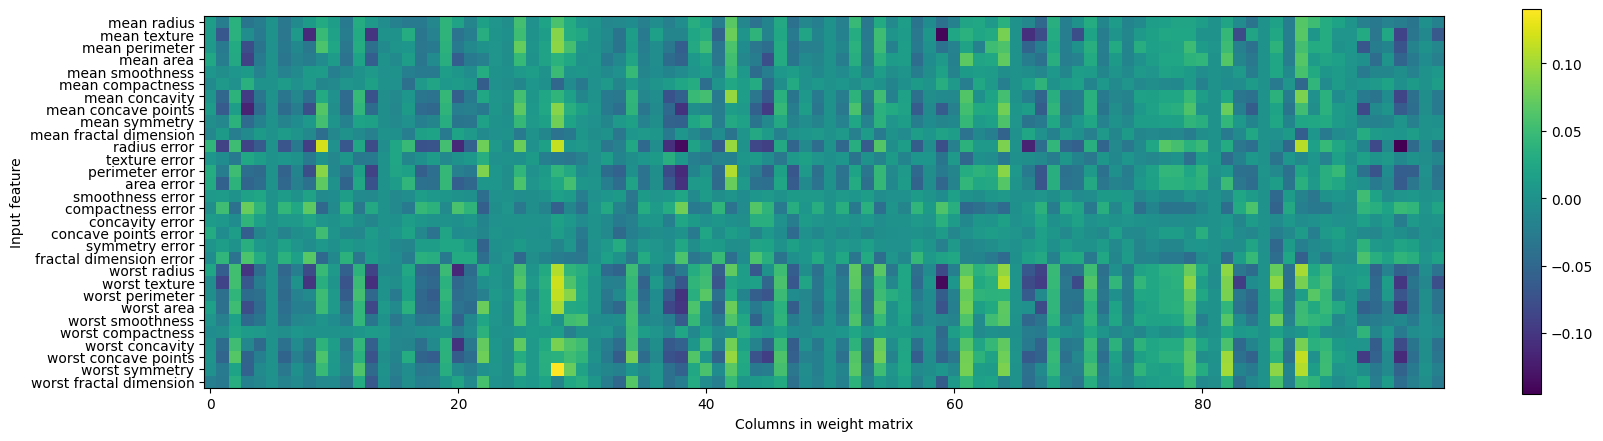

In [24]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

While it is possible to analyze what a neural network has learned, this is usually much trickier than analyzing a linear model or a tree-based model. One way to inspect what was learned is to look at the weights in the model. You can see an example of this in the scikit-learn example gallery. For the Breast Cancer dataset, this might be a bit hard to understand. The following plot  shows the weights that were learned connecting the input to the first hidden layer. The rows in this plot correspond to the 30 input features, while the columns correspond to the 100 hidden units. Light colors represent large positive values, while dark colors represent negative values

One possible inference we can make is that features that have very small weights for all of the hidden units are “less important” to the model. We can see that “mean smoothness” and “mean compactness,” in addition to the features found between “smoothness error” and “fractal dimension error,” have relatively low weights compared to other features. This could mean that these are less important features or possibly that we didn’t represent them in a way that the neural network could use.